In [1]:
import matplotlib.pyplot as plt
import scipy.interpolate as si
import numpy as np

In [2]:
# Вариант 6
p = [[-2, -5.38], [-1, -2.44], [0, 1.73], [1, 2.63], [2, -8.42], [3, 4.08], [4, -4.38]]

In [3]:
def poly_lagrange(p):
    x = [el[0] for el in p]
    y = [el[1] for el in p]
    poly1d = si.lagrange(x, y)
    #     def f(x: float):
    #         to_return = 0
    #         for coef in enumerate(poly1d):
    #             print(coef)
    #         return 0
    return poly1d


print("Значение в точке -1.3: ", poly_lagrange(p)(-1.3))
print("Значение в точке 1.75: ", poly_lagrange(p)(1.75))
print(poly_lagrange(p).c)

Значение в точке -1.3:  -0.5762140156250006
Значение в точке 1.75:  -6.282676849365231
[-0.23965278  1.12195833  1.02409722 -6.708125   -2.41944444  8.12116667
  1.73      ]


In [4]:
def dd(p: list, start: int, end: int):
    to_return = 0
    for jdx, point in enumerate(p[start : end + 1]):
        den = 1
        for idx in np.arange(start, end + 1):
            if idx != jdx + start:
                den *= point[0] - p[idx][0]
        to_return += point[1] / den
    return to_return


dd(p, 1, 2)

4.17

In [5]:
def n_j(p: list, end: int):
    to_return = np.poly1d([1])
    for point in p[:end]:
        to_return *= np.poly1d([1, -point[0]])
    return to_return


n_j(p, 6)

poly1d([  1,  -3,  -5,  15,   4, -12,   0])

In [6]:
def poly_newton(p: list):
    to_return = np.poly1d([0])
    for idx, point in enumerate(p):
        to_return += dd(p, 0, idx) * n_j(p, idx)
    return to_return


print("В точке -1.3: ", poly_newton(p)(-1.3))
print("В точке 1.75: ", poly_newton(p)(1.75))
print(poly_newton(p).c)

В точке -1.3:  -0.5762140156249993
В точке 1.75:  -6.282676849365238
[-0.23965278  1.12195833  1.02409722 -6.708125   -2.41944444  8.12116667
  1.73      ]


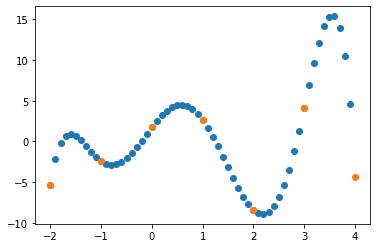

In [7]:
spline = []
q = []


def draw():
    poly = poly_lagrange(p)
    x_poly = np.arange(p[0][0], p[-1][0], 0.1)
    y_lagrange = [poly(el) for el in x_poly]
    plt.scatter(x_poly, y_lagrange)

    x = [el[0] for el in p]
    y = [el[1] for el in p]
    plt.scatter(x, y)


draw()

In [8]:
def output_points():
    print("Original points: ")
    for item in p:
        print(f"({item[0]}, {item[1]}),", end="")


#     print("\n\nB-spline points: ")
#     for item in spline:
#         print(f'({item[0]}, {item[1]}),',end='')

#     print("\n\nQ points: ")
#     for item in q:
#         print(f'({item[0]}, {item[1]}),',end='')

output_points()

Original points: 
(-2, -5.38),(-1, -2.44),(0, 1.73),(1, 2.63),(2, -8.42),(3, 4.08),(4, -4.38),